In [164]:
# imports
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split

%matplotlib inline

# Linear Regression

## Let's grab some data

In [10]:
data = fetch_california_housing(return_X_y=False, as_frame=True)

In [11]:
X, y = data.data, data.target

In [12]:
X.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000


In [13]:
y.describe()

count    20640.000000
mean         2.068558
std          1.153956
min          0.149990
25%          1.196000
50%          1.797000
75%          2.647250
max          5.000010
Name: MedHouseVal, dtype: float64

In [16]:
df = X.copy()
df['Price'] = y

In [17]:
df.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
Price,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


<AxesSubplot:>

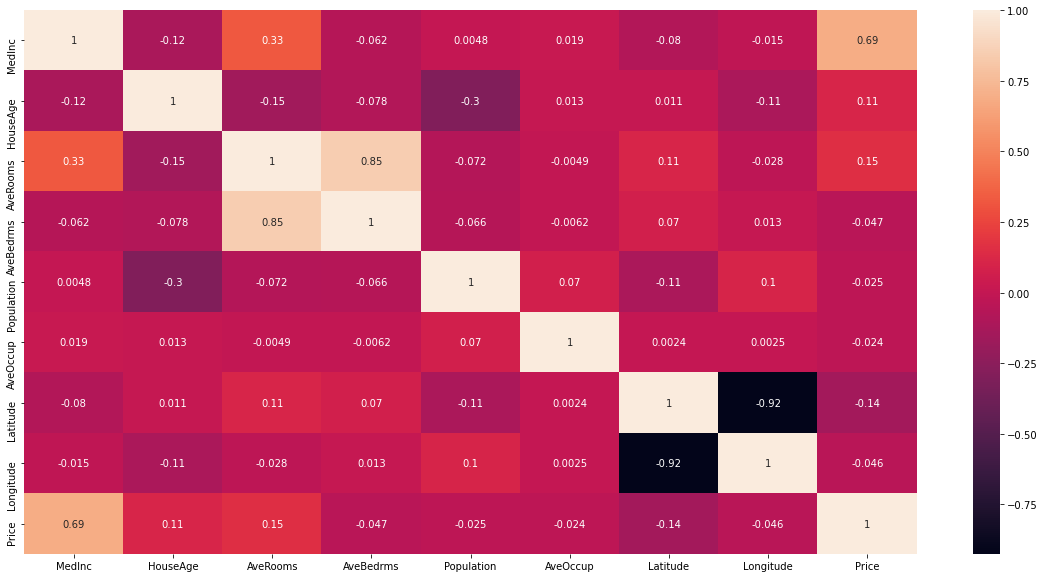

In [24]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 10)
sns.heatmap(df.corr(), annot=True)

### Let's go with most correlated feature with Price

In [78]:
X_med_inc = X[['MedInc']]

#### Split data into train/test and validation of 60/20/20

In [59]:
X_train_test, X_validation, y_train_test, y_validation = train_test_split(X_med_inc, y, test_size=0.2, random_state=42)

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X_train_test, y_train_test, train_size=0.75, random_state=42)

In [61]:
len(X_train) / len(X_med_inc)

0.6

In [62]:
len(X_test)  / len(X_med_inc)

0.2

In [63]:
len(X_validation)  / len(X_med_inc)

0.2

### But really regression only needs a train/test split not train/test/validation since linear regression doesn't use extra test data during training so let's use a 70/30 split

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X_med_inc, y, train_size=0.7, random_state=42)

In [98]:
model = LinearRegression()
model.fit(X=X_train, y=y_train)

LinearRegression()

In [66]:
print(f"y = {model.coef_[0]}x + {model.intercept_}")

y = 0.4181944223983199x + 0.4479616325338347


In [67]:
from sklearn.metrics.tests.test_regression import r2_score, mean_squared_error

In [72]:
y_predicted = model.predict(X_test)

In [73]:
r2_score(y_test, y_predicted)

0.47292621250963174

In [74]:
mean_squared_error(y_test, y_predicted)

0.6916951935610179

In [89]:
# note mode.score is the r2 score
model.score(X_test, y_test)

0.47292621250963174

## With multiple features

In [264]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)

In [265]:
model = LinearRegression()
model.fit(X=X_train, y=y_train)

LinearRegression()

In [266]:
model.coef_

array([ 4.45813835e-01,  9.68254369e-03, -1.22075816e-01,  7.78502858e-01,
       -7.76656073e-07, -3.37000495e-03, -4.18543513e-01, -4.33687881e-01])

In [267]:
model.intercept_

-37.05595790179788

In [268]:
model.score(X_test, y_test)

0.5957681720649695

## LASSO regressor

In [269]:
model = Lasso()
model.fit(X_train, y_train)

Lasso()

In [270]:
model.score(X_test, y_test)

0.28803026398454623

In [271]:
model.coef_

array([ 1.47260739e-01,  5.95864395e-03,  0.00000000e+00, -0.00000000e+00,
       -5.59749984e-06, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00])

In [272]:
model.intercept_

1.3360624471798466

### Scaling with min/max

In [273]:
x_scaler = StandardScaler()
X_scaled = x_scaler.fit_transform(X)

y_scaler = StandardScaler()
y_scaled = y_scaler.fit_transform(pd.DataFrame(data={'y': y}))

In [274]:
scaled_X_train, scaled_X_test, scaled_y_train, scaled_y_test = train_test_split(X_scaled, y_scaled, train_size=0.7, random_state=42)

In [275]:
model_2 = Lasso()
model_2.fit(scaled_X_train, scaled_y_train)

Lasso()

In [276]:
model_2.score(scaled_X_test, scaled_y_test)

-4.0358175403820695e-06

# Note that lasso regressor can be use for feature selection -> the coefficients are the important ones

In [277]:
importance = np.abs(model.coef_)

In [278]:
X.columns[importance > 0]

Index(['MedInc', 'HouseAge', 'Population'], dtype='object')

In [279]:
from sklearn.tree import DecisionTreeRegressor

In [280]:
model = DecisionTreeRegressor(max_depth=3)
model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3)

In [281]:
model.feature_importances_

array([0.85016599, 0.        , 0.02917589, 0.        , 0.        ,
       0.12065812, 0.        , 0.        ])

In [282]:
importance = np.abs(model.feature_importances_)

In [283]:
X.columns[importance > 0]

Index(['MedInc', 'AveRooms', 'AveOccup'], dtype='object')

[Text(0.5, 0.875, 'X[0] <= 5.032\nsquared_error = 1.34\nsamples = 14447\nvalue = 2.069'),
 Text(0.25, 0.625, 'X[0] <= 3.074\nsquared_error = 0.835\nsamples = 11339\nvalue = 1.73'),
 Text(0.125, 0.375, 'X[2] <= 4.201\nsquared_error = 0.565\nsamples = 5490\nvalue = 1.356'),
 Text(0.0625, 0.125, 'squared_error = 0.701\nsamples = 2018\nvalue = 1.664'),
 Text(0.1875, 0.125, 'squared_error = 0.398\nsamples = 3472\nvalue = 1.176'),
 Text(0.375, 0.375, 'X[5] <= 2.35\nsquared_error = 0.834\nsamples = 5849\nvalue = 2.081'),
 Text(0.3125, 0.125, 'squared_error = 1.3\nsamples = 1270\nvalue = 2.822'),
 Text(0.4375, 0.125, 'squared_error = 0.509\nsamples = 4579\nvalue = 1.875'),
 Text(0.75, 0.625, 'X[0] <= 6.868\nsquared_error = 1.226\nsamples = 3108\nvalue = 3.308'),
 Text(0.625, 0.375, 'X[5] <= 2.671\nsquared_error = 0.904\nsamples = 2201\nvalue = 2.918'),
 Text(0.5625, 0.125, 'squared_error = 1.019\nsamples = 782\nvalue = 3.467'),
 Text(0.6875, 0.125, 'squared_error = 0.583\nsamples = 1419\nvalue

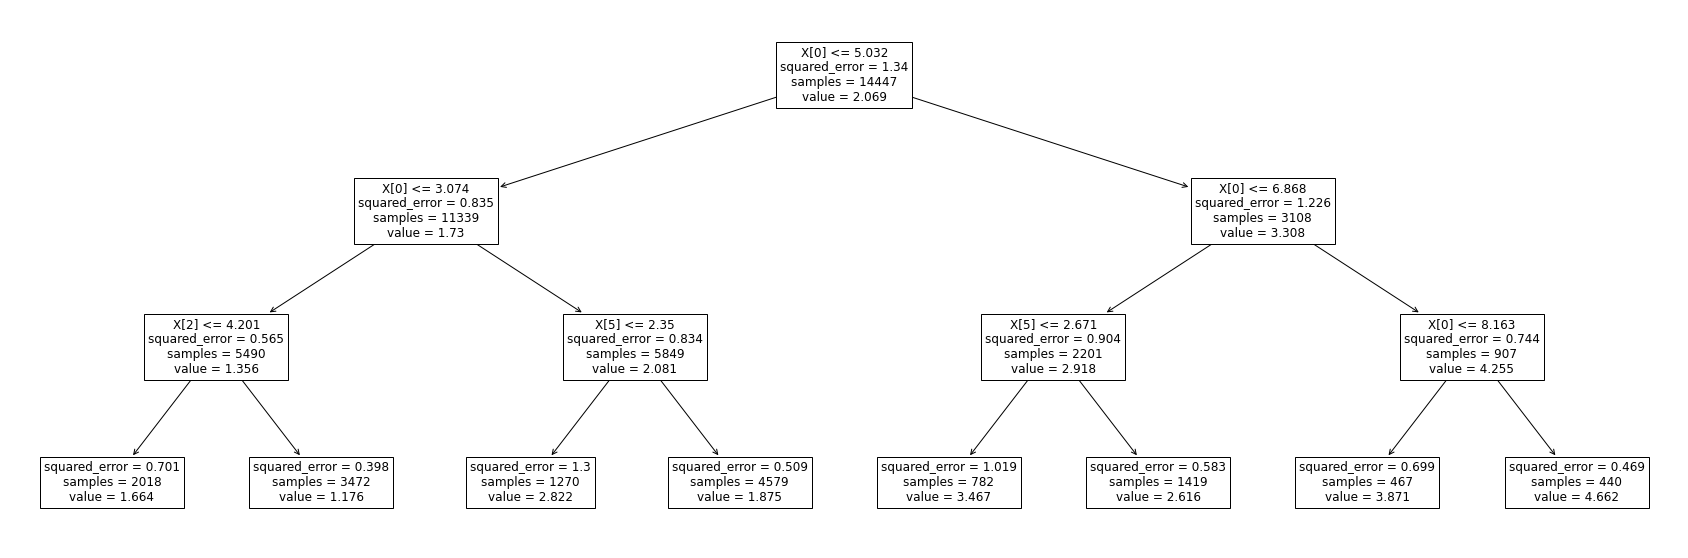

In [284]:
from sklearn.tree import plot_tree
fig, ax = plt.subplots()
fig.set_size_inches(30, 10)
plot_tree(model, ax=ax, fontsize=12)

### Logit Regressor

In [285]:
anomaly_y = ((2.068558 - 2 * 1.153956) > y) | ((2.068558 + 2 * 1.153956) < y)

In [286]:
anomaly_y[:10]

0     True
1    False
2    False
3    False
4    False
5    False
6    False
7    False
8    False
9    False
Name: MedHouseVal, dtype: bool

In [287]:
from sklearn.linear_model import LogisticRegression

In [288]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, anomaly_y, train_size=0.7, random_state=42)

In [303]:
model = LogisticRegression(max_iter=10000, C=1e3)
model.fit(X_train, y_train)

LogisticRegression(C=1000.0, max_iter=10000)

In [304]:
# returns the accuracy
model.score(X_test, y_test)

0.9570482803164864

In [305]:
model.predict(X_test[:10])

array([False, False, False, False, False, False, False, False, False,
        True])

In [299]:
y_test[:10]

20046    False
3024     False
15663     True
20484    False
9814     False
13311    False
7113     False
7668     False
18246    False
5723      True
Name: MedHouseVal, dtype: bool

In [306]:
from sklearn.metrics import confusion_matrix, f1_score, recall_score, precision_score

In [307]:
y_pred = model.predict(X_test)

In [308]:
confusion_matrix(y_test, y_pred)

array([[5746,   41],
       [ 225,  181]], dtype=int64)

In [309]:
f1_score(y_test, y_pred)

0.5764331210191083

In [310]:
recall_score(y_test, y_pred)

0.4458128078817734

In [311]:
precision_score(y_test, y_pred)

0.8153153153153153